In [252]:
from skimage.io import imread
from skimage.filters import threshold_otsu
import matplotlib.pyplot as plt
import numpy as np
import cv2
car_image_plain = imread("/home/chiransh/Downloads/IMG_car.JPG")
car_image = imread("/home/chiransh/Downloads/IMG_car.JPG", as_grey=True)
# it should be a 2 dimensional array
print(car_image.shape)

# the next line is not compulsory however, a grey scale pixel
# in skimage ranges between 0 & 1. multiplying it with 255
# will make it range between 0 & 255 (something we can relate better with

gray_car_image = car_image * 255
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
ax1.imshow(gray_car_image, cmap="gray")
threshold_value = threshold_otsu(gray_car_image)
print threshold_value
binary_car_image = gray_car_image > threshold_value
ax2.imshow(binary_car_image, cmap="gray")
gaussian_img=cv2.GaussianBlur(gray_car_image, (5,5), 0)
ax3.imshow(gaussian_img, cmap="gray")


(2448, 3264)
125.08327382812499


In [253]:
import pandas as pd
import numpy as np

In [254]:

train=pd.read_csv('/home/chiransh/Downloads/sla-rental-tender-and-bidding-results-information/sla-tender-and-bidding-results-information.csv')
train.head(5)

,land_area,gross_floor_area,closing_date,award_date,successful_bidder,Group B
0,2478.0,2985.0,60,6/14/2004,Lee Wee Peng,NaN
1,7440.0,3788.0,60,09/03/04,East Asia School of Business Pte Ltd,NaN
2,3310.0,891.0,73,10/06/04,Ng Joo Hong,NaN
3,15806.5,12680.0,88,10/28/2004,Sheng Siong Supermarket Pte Ltd,NaN
4,4048.1,3386.0,70,11/23/2004,Crestan Education Group Pte Ltd,NaN


In [255]:
train.shape
train=train.drop(['award_date'],axis=1)
train.head()

,land_area,gross_floor_area,closing_date,successful_bidder,Group B
0,2478.0,2985.0,60,Lee Wee Peng,NaN
1,7440.0,3788.0,60,East Asia School of Business Pte Ltd,NaN
2,3310.0,891.0,73,Ng Joo Hong,NaN
3,15806.5,12680.0,88,Sheng Siong Supermarket Pte Ltd,NaN
4,4048.1,3386.0,70,Crestan Education Group Pte Ltd,NaN


In [183]:
train=train[:100]
train.shape

(100, 5)

In [256]:
import matplotlib.pyplot as plt

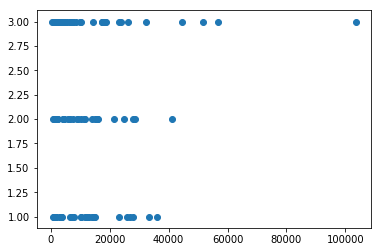

In [283]:
plt.scatter(X['land_area'],y)
plt.show()

In [257]:
import random
train['successful_bidder']= np.random.randint(1,4, len(train))
train['successful_bidder'].unique()
train.tail(5)

,land_area,gross_floor_area,closing_date,successful_bidder,Group B
369,5850.00,457.90,14,1,NaN
370,2318.00,583.43,34,2,NaN
371,56546.60,30384.50,35,1,NaN
372,11983.50,8081.40,12,1,NaN
373,27127.17,14326.30,31,3,NaN


In [190]:
train.mean()
train=train.fillna(train.mean())
train=train.drop(['Group B'],axis=1)

In [198]:
print train.land_area.dtype
print train.gross_floor_area.dtype
print train.closing_date.dtype
print train.successful_bidder.dtype

float64
float64
int64
int64


In [200]:
train['closing_date']=train['closing_date'].astype(str).astype(float)
print train.closing_date.dtype


float64


In [201]:
features=['land_area','gross_floor_area','closing_date']
X=train[features]
y=train['successful_bidder']



In [240]:

import xgboost as xgb
xg = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xg.fit(X,y)


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.05, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [233]:
test=pd.read_csv('/home/chiransh/Downloads/testdata.csv')
print test

   land_area  gross_floor_area  closing_date
0    12856.8              2046            40


In [241]:
xpreds = xg.predict_proba(test)
print xpreds

[[0.8064512  0.15797007 0.03557875]]


In [249]:
# importing the requests library
import requests
 
# api-endpoint
URL = "http://12a8e183.ngrok.io/company"
 
# sending get request and saving the response as response object
r = requests.get(url = URL)
 
# extracting data in json format
data = r.json()


In [250]:
print data

{}


In [251]:
xgb.XGBClassifier?